<a href="https://colab.research.google.com/github/2403A52L07/2403A52L07-AIML/blob/main/AIML_assignment_5(2403A52l07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sn
train_df=pd.read_csv("/content/titanic_train.csv")
train_df.head()
test_df=pd.read_csv("/content/titanic_test.csv")
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


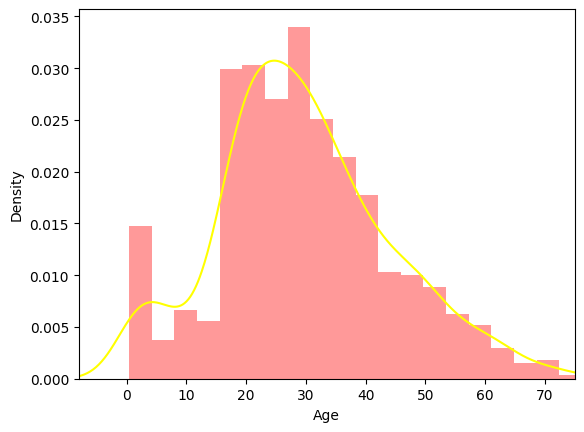

In [12]:
import matplotlib.pyplot as plt

ax = train_df["Age"].hist(bins=21, density=True, stacked=True, color='red', alpha=0.4)
train_df["Age"].plot(kind='density', color='yellow', ax=ax)
ax.set_xlabel('Age')
ax.set_xlim(-8, 75)
plt.show()


In [15]:
print('Percent of missing "Age" records is %.2f%%' % ((train_df['Age'].isnull().sum() / train_df.shape[0]) * 100))
print('The mean of "Age" is %.2f' % train_df["Age"].mean(skipna=True))
print('The median of "Age" is %.2f' % train_df["Age"].median(skipna=True))
print('Percent of missing "Cabin" records is %.2f%%' % ((train_df['Cabin'].isnull().sum() / train_df.shape[0]) * 100))


Percent of missing "Age" records is 19.87%
The mean of "Age" is 29.70
The median of "Age" is 28.00
Percent of missing "Cabin" records is 77.10%


In [26]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


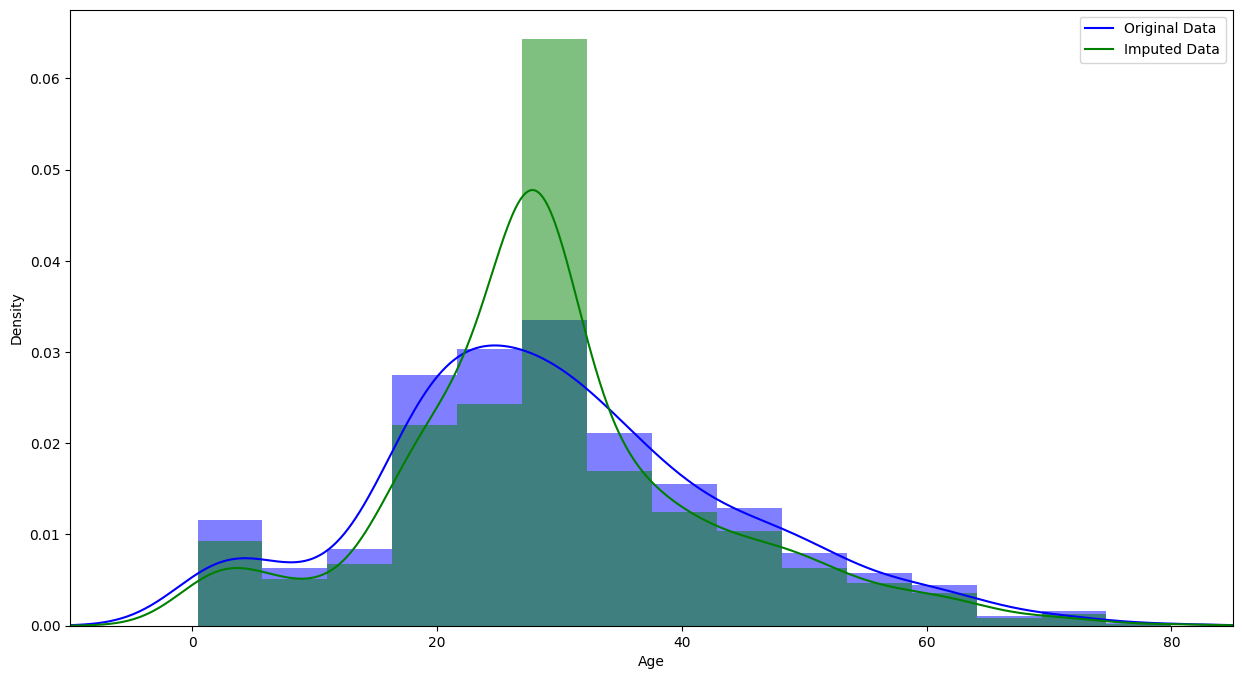

In [32]:
plt.figure(figsize=(15,8))

ax = plt.gca()
train_df["Age"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.5, ax=ax)
train_df["Age"].plot(kind='kde', color='blue', ax=ax)
train_data["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.5, ax=ax)
train_data["Age"].plot(kind='kde', color='green', ax=ax)

ax.set_xlabel('Age')
ax.set_xlim(-10, 85)
ax.legend(['Original Data', 'Imputed Data'])
plt.show()


In [33]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,False,False,True,False,False,True,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,False,True,False
3,1,35.0,1,0,53.1000,True,False,False,False,False,True,False
4,0,35.0,0,0,8.0500,False,False,True,False,False,True,True


In [34]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [36]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


<ipython-input-42-96e992f4974a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
<ipython-input-42-96e992f4974a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)


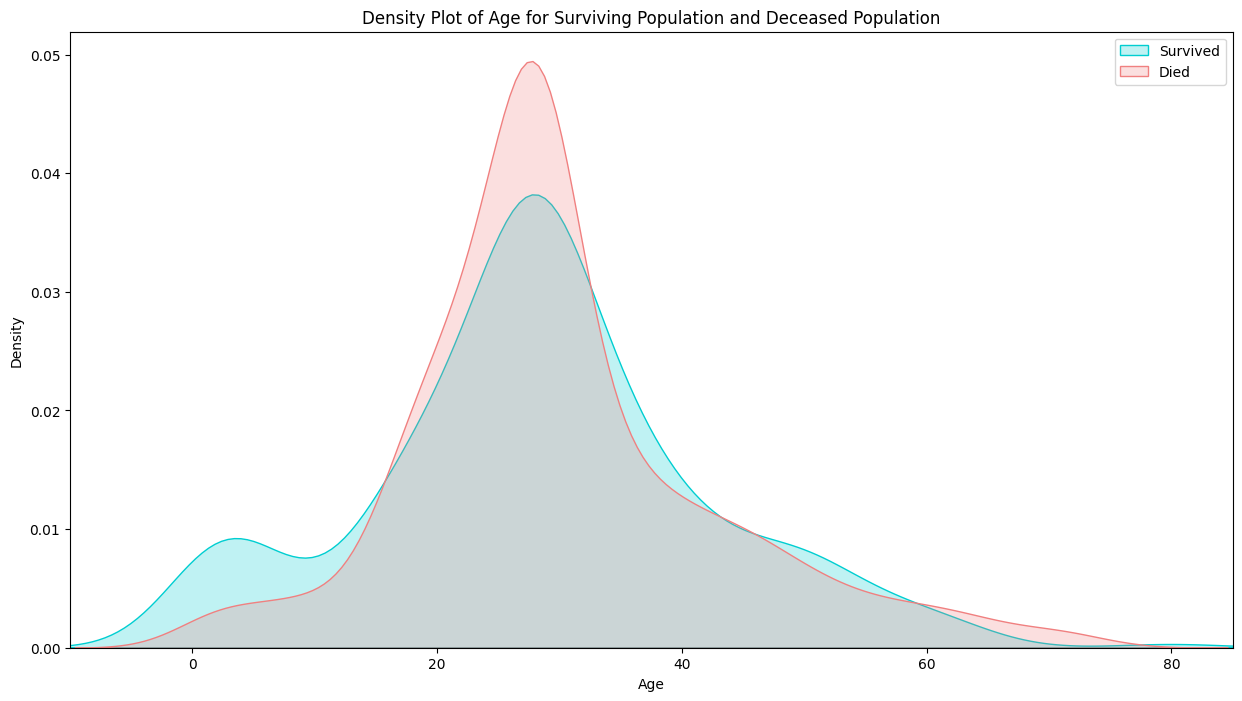

In [42]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

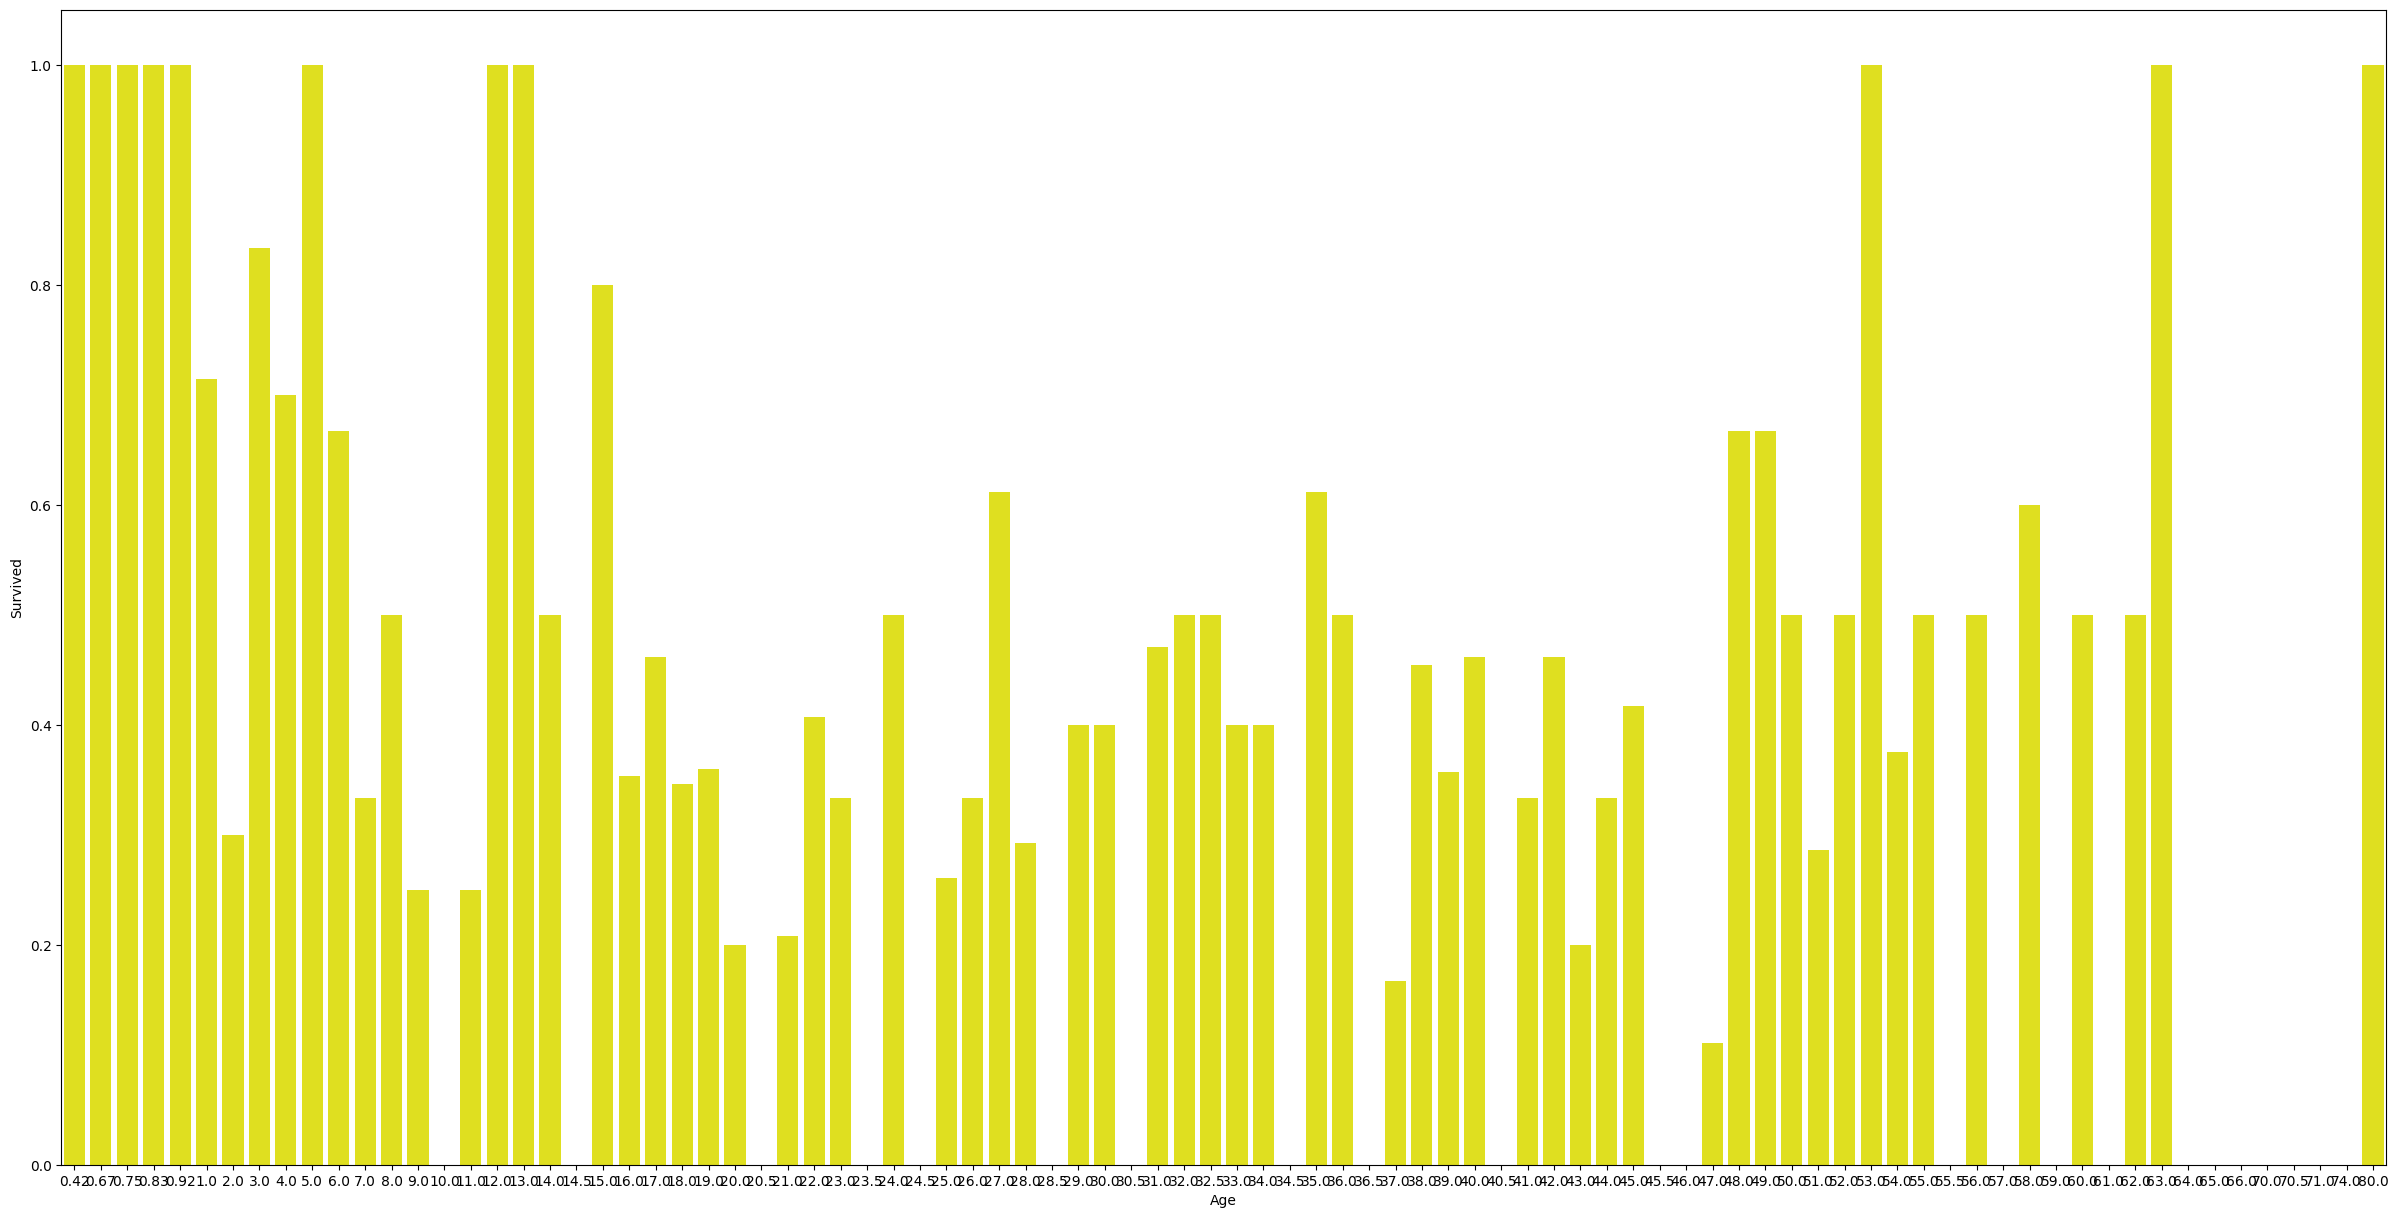

In [48]:
plt.figure(figsize=(30,15))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="yellow")
plt.show()

<ipython-input-49-ac5085c4ced2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
<ipython-input-49-ac5085c4ced2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)


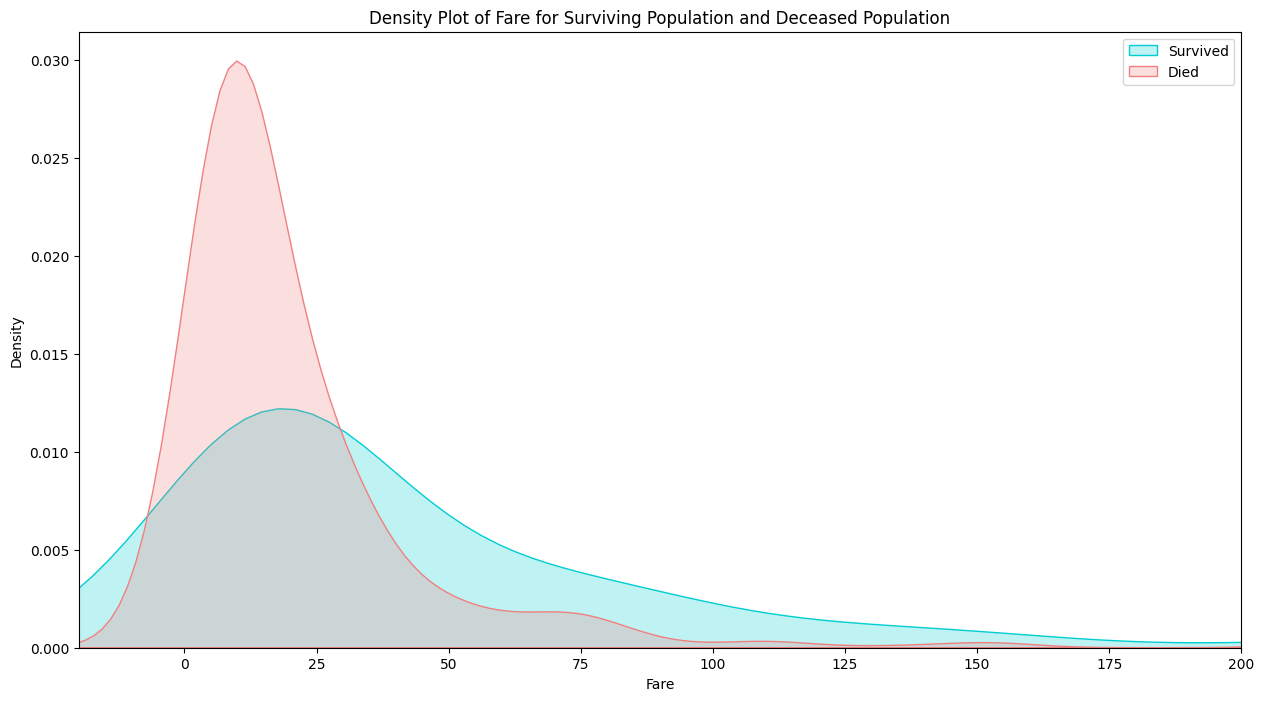

In [49]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()


Text(0.5, 1.0, 'Survival Rate by Embarked')

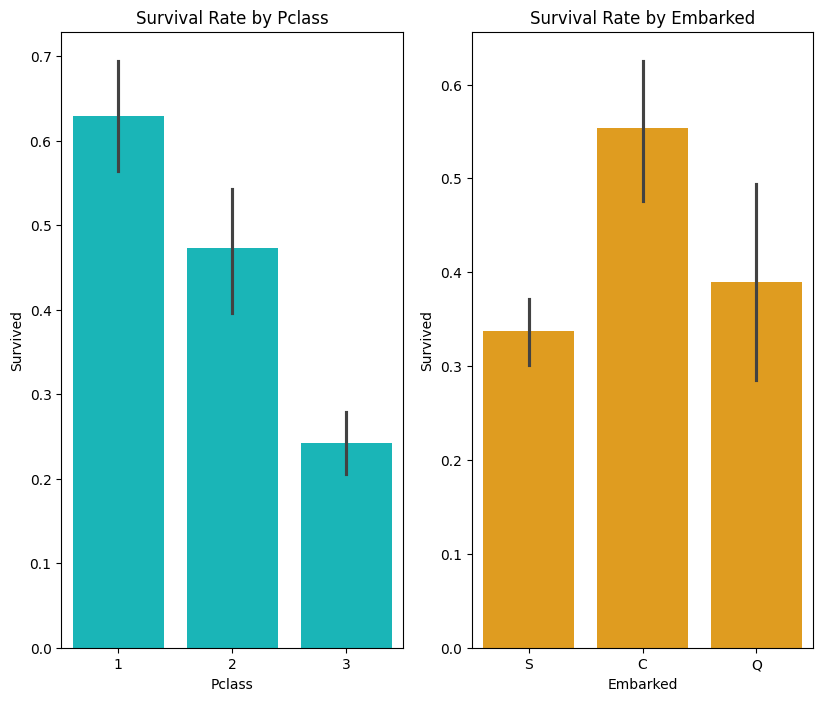

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")
plt.title('Survival Rate by Pclass')

plt.subplot(1, 3, 2)
sns.barplot(x='Embarked', y='Survived', data=train_df, color="orange")
plt.title('Survival Rate by Embarked')



In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
import matplotlib.pyplot as plt
print(final_train.columns)



Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')


<ipython-input-69-f4add2a15188>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True, label='Survived')
<ipython-input-69-f4add2a15188>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True, label='Died')


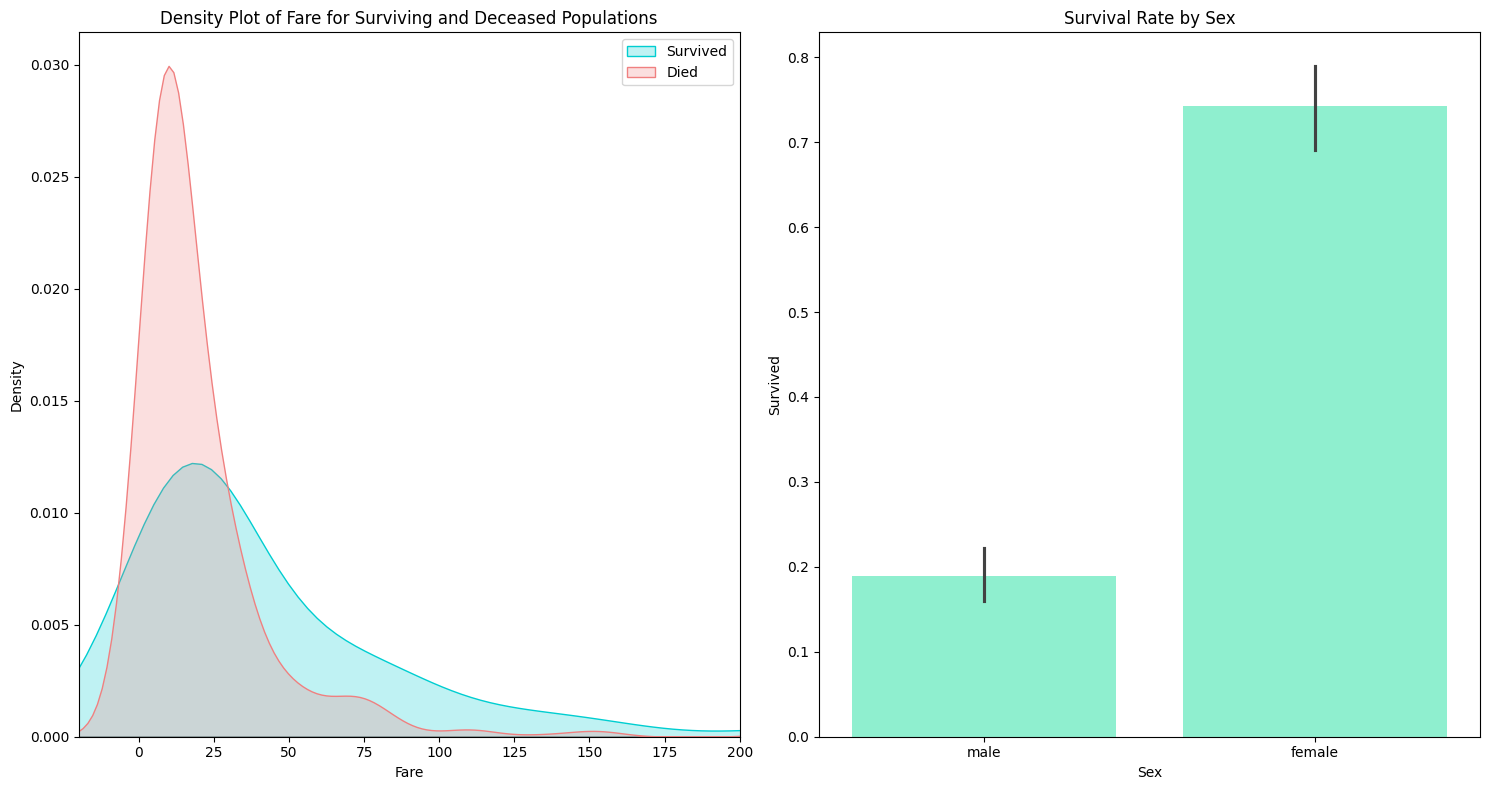

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True, label='Survived')
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True, label='Died')
plt.xlabel('Fare')
plt.title('Density Plot of Fare for Surviving and Deceased Populations')
plt.xlim(-20, 200)
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=train_df, color="aquamarine")
plt.title('Survival Rate by Sex')

plt.tight_layout()
plt.show()


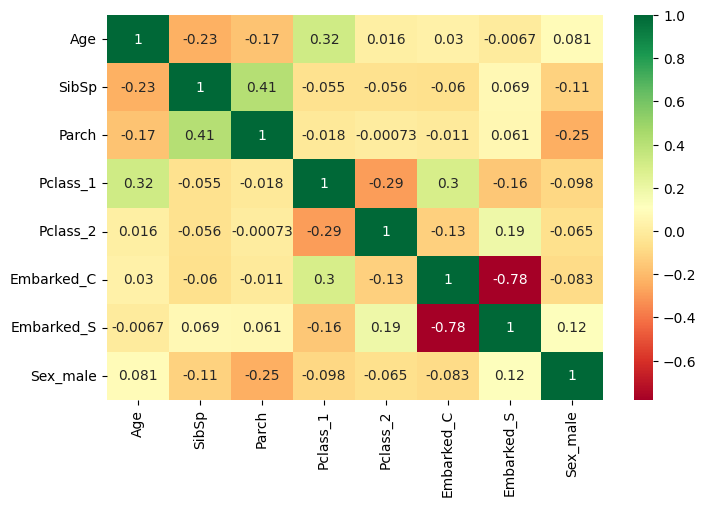

In [58]:
Selected_features = ['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Embarked_C','Embarked_S', 'Sex_male']

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()